# **Project Name**    -



##### **Project Type**    - Unsupervised Machine Learning Project
##### **Contribution**    - Individual
##### **Apurba Koirala**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/apurbaaaa/Zomato

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from kmodes.kmodes import KModes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from nltk.corpus import stopwords
import warnings
from textblob import TextBlob
from wordcloud import WordCloud

### Dataset Loading

In [ ]:
# Load Dataset
names = pd.read_csv("Zomato Restaurant names and Metadata.csv")
reviews = pd.read_csv("Zomato Restaurant reviews.csv")

### Dataset First View

In [ ]:
# Dataset First Look
names.head()

In [ ]:
reviews.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Names and Metadata count: ", names.shape)
print("Reviews count: ", reviews.shape)

### Dataset Information

In [ ]:
# Dataset Info
names.info()

In [ ]:
reviews.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value 
print("Duplicated Value Count in Names and Metadata: ", names.duplicated().sum(), "\n")
print("Duplicated Value Count in Reviews: ", reviews.duplicated().sum(), "\n")

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Null Value Count in Names and Metadata: ", names.isnull().sum(), "\n")
print("Null Value Count in Reviews: ", reviews.isnull().sum(), "\n")

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(names.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Names and Titles DataFrame")

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(reviews.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Reviews DataFrame")

plt.tight_layout()
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(names.columns, "\n", reviews.columns)

In [ ]:
# Dataset Describe
names.describe()

In [ ]:
reviews.describe()

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
names.nunique()

In [ ]:
reviews.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Remove non-numeric rating values
# reviews = reviews[reviews['Rating'] != 'Like']
# Remove non-numeric rating values
reviews = reviews[reviews['Rating'] != 'Like']

# Fill missing values in 'Collections' column
names['Collections'].fillna('No Collections Available', inplace=True)

# Drop rows where the 'Review' column is null
reviews.dropna(subset=['Review'], inplace=True)

# Fill missing values in 'Timings' column
names['Timings'].fillna("Unknown", inplace=True)

# Remove duplicate reviews
reviews.drop_duplicates(keep='first', inplace=True)

reviews['Rating'] = pd.to_numeric(reviews['Rating'], errors='coerce')

# Calculate the average rating per restaurant
average_ratings = reviews.groupby('Restaurant')['Rating'].mean()

# Merge the average ratings back into the original DataFrame
reviews['average_rating'] = reviews['Restaurant'].map(average_ratings)

reviews.head()
reviews.drop("Rating", axis = 1)
warnings.filterwarnings("ignore")

In [ ]:
df = reviews.merge(names, left_on="Restaurant", right_on="Name", how="left")
df.drop(columns=["Name"], inplace=True)

In [ ]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    return "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"

# Apply sentiment analysis
df["Sentiment"] = df["Review"].map(get_sentiment)

In [ ]:
df["Sentiment"].head()

In [ ]:
df.head()

In [ ]:
df.to_csv("merged.csv", index=False)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
sns.set_style("whitegrid")
# 1. Sentiment Distribution (Univariate)
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment"], palette="viridis")
plt.title("Sentiment Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# 2. Rating Distribution (Univariate)
plt.figure(figsize=(6, 4))
sns.histplot(df["Rating"], bins=10, kde=True, color="blue")
plt.title("Rating Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
# 3. Average Rating Distribution (Univariate)
plt.figure(figsize=(6, 4))
sns.histplot(df["average_rating"], bins=10, kde=True, color="green")
plt.title("Average Rating Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
# 4. Cost Distribution (Univariate)
df["Cost"] = pd.to_numeric(df["Cost"], errors="coerce")
plt.figure(figsize=(6, 4))
sns.histplot(df["Cost"].dropna(), bins=20, kde=True, color="red")
plt.title("Cost Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# 5. Sentiment vs. Rating (Bivariate)
plt.figure(figsize=(6, 4))
sns.boxplot(x="Sentiment", y="Rating", data=df, palette="Set2")
plt.title("Sentiment vs. Rating")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# 6. Sentiment vs. Cost (Bivariate)
plt.figure(figsize=(6, 4))
sns.boxplot(x="Sentiment", y="Cost", data=df, palette="coolwarm")
plt.title("Sentiment vs. Cost")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# 7. Word Cloud - Positive Reviews (Univariate)
positive_reviews = " ".join(df[df["Sentiment"] == "Positive"]["Review"].dropna())
wordcloud_positive = WordCloud(width=500, height=500, background_color="white").generate(positive_reviews)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Word Cloud - Positive Reviews")
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# 8. Word Cloud - Negative Reviews (Univariate)
negative_reviews = " ".join(df[df["Sentiment"] == "Negative"]["Review"].dropna())
wordcloud_negative = WordCloud(width=500, height=500, background_color="black", colormap="Reds").generate(negative_reviews)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Word Cloud - Negative Reviews")
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# 9. Top Cuisines (Univariate)
top_cuisines = df["Cuisines"].value_counts().head(10)
plt.figure(figsize=(6, 4))
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="magma")
plt.title("Top 10 Cuisines")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# 10. Top Restaurants by Review Count (Univariate)
top_restaurants = df["Restaurant"].value_counts().head(10)
plt.figure(figsize=(6, 4))
sns.barplot(y=top_restaurants.index, x=top_restaurants.values, palette="coolwarm")
plt.title("Top 10 Restaurants by Review Count")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
# 11. Cost vs. Rating (Bivariate)
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Cost", y="Rating", data=df, alpha=0.5, color="purple")
plt.title("Cost vs. Rating")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
# 12. Rating vs. Average Rating (Bivariate)
plt.figure(figsize=(6, 4))
sns.regplot(x="average_rating", y="Rating", data=df, color="darkblue")
plt.title("Rating vs. Average Rating")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
# 13. Sentiment vs. Top 10 Restaurants (Multivariate)
top_restaurant_sentiments = df[df["Restaurant"].isin(top_restaurants.index)]
plt.figure(figsize=(8, 6))
sns.countplot(y="Restaurant", hue="Sentiment", data=top_restaurant_sentiments, palette="viridis")
plt.title("Sentiment vs. Top 10 Restaurants")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

#### Chart - 14

In [ ]:
# Chart - 14 visualization code
# 14. Average Cost by Sentiment and Cuisine (Multivariate)
df_grouped = df.groupby(["Cuisines", "Sentiment"])["Cost"].mean().reset_index()
df_grouped = df_grouped[df_grouped["Cuisines"].isin(top_cuisines.index)]
plt.figure(figsize=(8, 6))
sns.barplot(y="Cuisines", x="Cost", hue="Sentiment", data=df_grouped, palette="coolwarm")
plt.title("Average Cost by Sentiment and Cuisine")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 15 - Correlation Heatmap

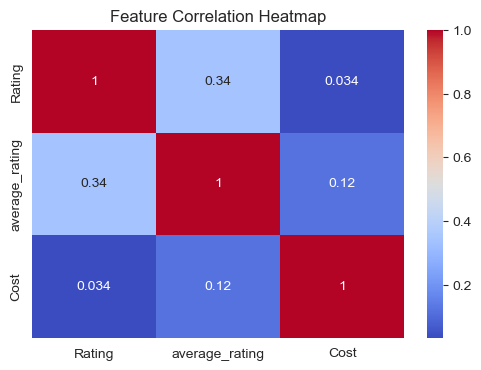

In [56]:
# Correlation Heatmap visualization code
plt.figure(figsize=(6, 4))
sns.heatmap(df[["Rating", "average_rating", "Cost"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 16 - Pair Plot

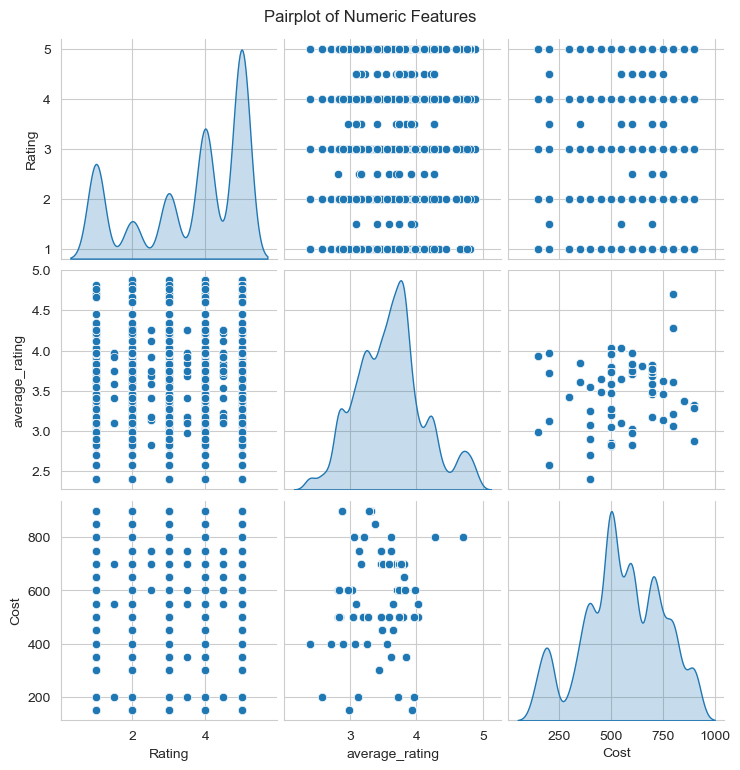

In [57]:
# Pair Plot visualization code
# 16. Pairplot of Numeric Features (Multivariate)
sns.pairplot(df[["Rating", "average_rating", "Cost"]], diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***